Connect mysql DBMS with jupyter notebook

In [36]:

import pandas as pd
import mysql.connector 
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'saller'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'delivery'),
    ('payments.csv', 'payments'),   # Added payments.csv for specific handling
    ('order_items.csv','order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    port = int(3306),
    user='root',
    password='#',
    database='ecomerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/dell 3400/Desktop/Datasets/ayushi_sql'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product_category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [42]:
db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "969075",
                            database = "ecomerce")

cur = db.cursor()

In [43]:
product=pd.DataFrame(pd.read_csv("C:/Users/dell 3400/Desktop/Datasets/ayushi_sql/products.csv"))
product

,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
order_item=pd.DataFrame(pd.read_csv("C:/Users/dell 3400/Desktop/Datasets/ayushi_sql/order_items.csv"))
order_item


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
payment=pd.DataFrame(pd.read_csv("C:/Users/dell 3400/Desktop/Datasets/ayushi_sql/payments.csv"))
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
orders=pd.DataFrame(pd.read_csv("C:/Users/dell 3400/Desktop/Datasets/ayushi_sql/orders.csv"))
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
#Joinning of multiple data frame in pandas

In [7]:
join=pd.merge(order_item,product,on='product_id')
join

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Furniture Decoration,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Garden tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computer accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sport leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computer accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [8]:
join_prop=pd.merge(join,payment,on='order_id')
join_prop

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Furniture Decoration,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Garden tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1,UPI,1,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computer accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1,UPI,1,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sport leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0,1,credit_card,3,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computer accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,1,credit_card,3,64.71


In [9]:
join_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    117601 non-null  object 
 1   order_item_id               117601 non-null  int64  
 2   product_id                  117601 non-null  object 
 3   seller_id                   117601 non-null  object 
 4   shipping_limit_date         117601 non-null  object 
 5   price                       117601 non-null  float64
 6   freight_value               117601 non-null  float64
 7   product_category            115903 non-null  object 
 8   product_name_length         115903 non-null  float64
 9   product_description_length  115903 non-null  float64
 10  product_photos_qty          115903 non-null  float64
 11  product_weight_g            117581 non-null  float64
 12  product_length_cm           117581 non-null  float64
 13  product_height

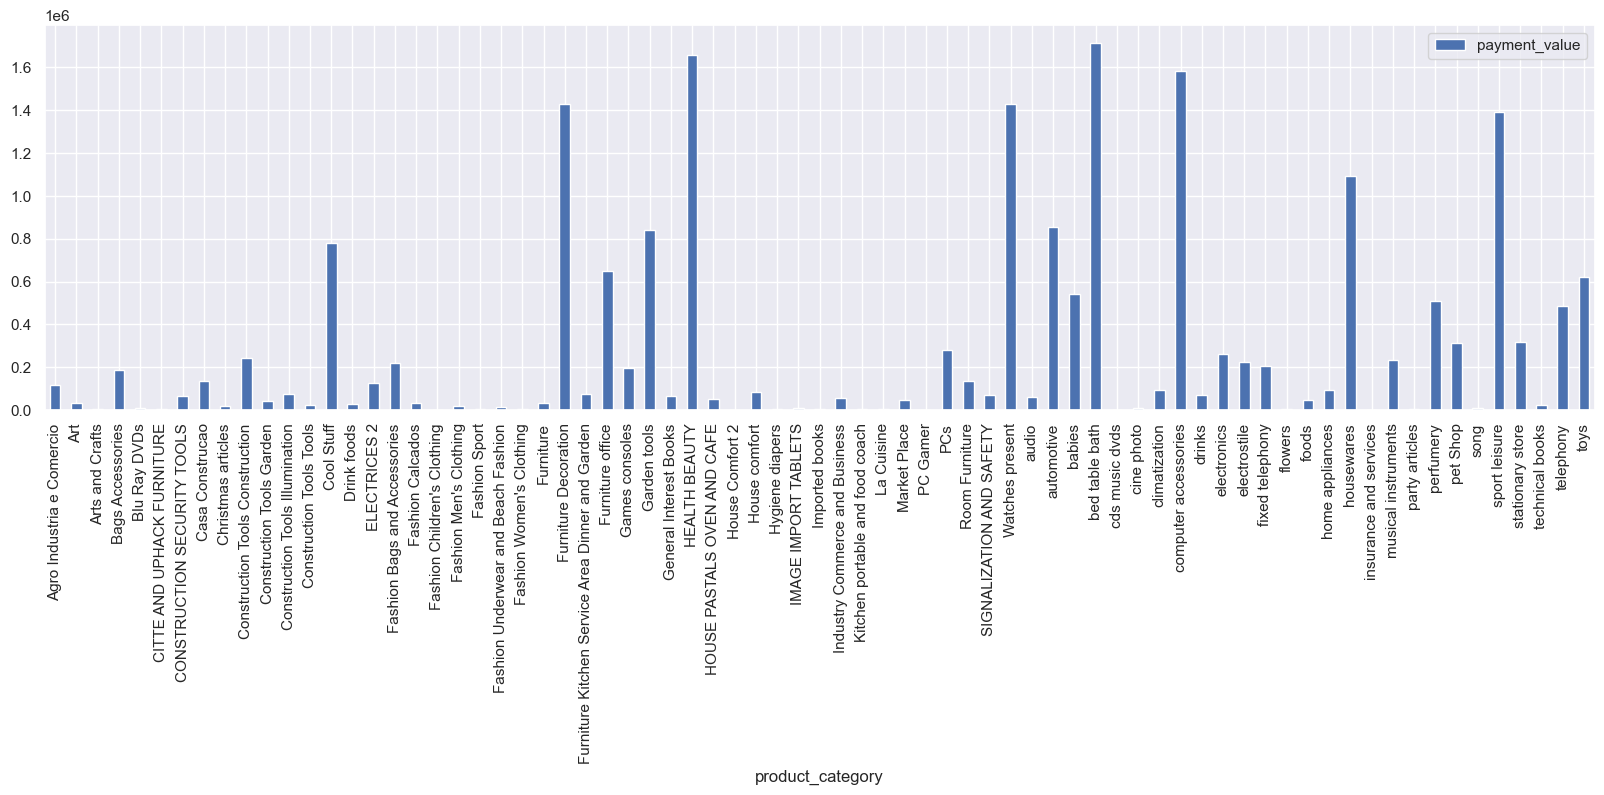

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5)})
join_prop.groupby(join_prop['product_category']).agg({'payment_value':'sum'}).plot(kind='bar')
plt.show()

In [11]:
mask=payment['payment_installments']>1
nann=payment[mask].count().unique()
nann

array([51338])

In [13]:
lenn=len(payment)
lenn

103886

In [ ]:
per=(nann/lenn)*100
print("Percentage :",per)

Prcentage of installment.

In [16]:
#5. Count the number of customers from each state.
customer=pd.DataFrame(pd.read_csv("C:/Users/dell 3400/Desktop/Datasets/ayushi_sql/customers.csv"))
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [17]:
gb2=customer.groupby(customer['customer_state']),customer['customer_id'].count()
print(gb2)
customer['customer_state'].value_counts()


(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000017E867D52B0>, np.int64(99441))


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

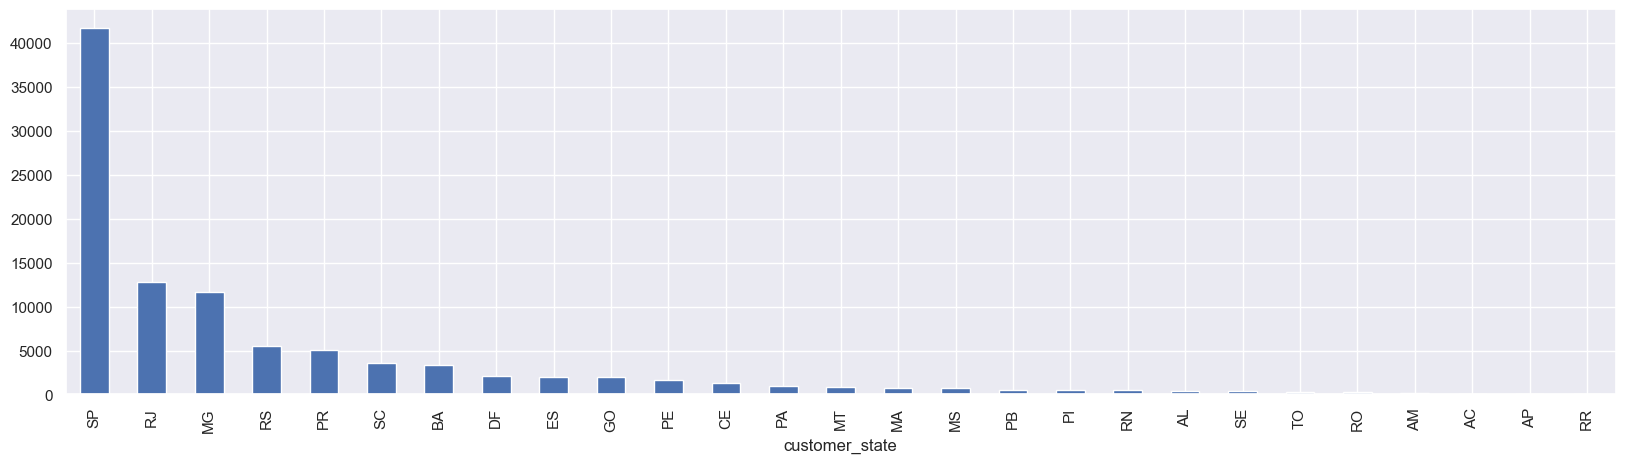

In [18]:
plot=customer['customer_state'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
Conclusion :- From the above graph we can say that sales in state - SP is highest as compare to other states.

In [19]:
order=pd.DataFrame(pd.read_csv("C:/Users/dell 3400/Desktop/Datasets/ayushi_sql/orders.csv"))
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
#1. Calculate the number of orders per month in 2018.
import numpy as np
import datetime as dt
order['Year'] = pd.DatetimeIndex(order['order_purchase_timestamp']).year



In [21]:
#We filtered the information of all orders which has come in 2018 year.
mask=pd.DatetimeIndex(order['order_purchase_timestamp']).year==2018
df=order[mask]
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,2018
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,2018
...,...,...,...,...,...,...,...,...,...
99428,c22a47117b6a87c967b0c278488110c1,6e153567dc52ea59c0498ef5383e9c7a,delivered,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07-23 00:00:00,2018
99430,c81f74e50f0496fa39716cc77cacd460,7b270ebc87c25c8404348c10ff80a80e,delivered,2018-03-04 22:48:38,2018-03-04 23:09:22,2018-03-05 16:15:04,2018-03-13 18:54:32,2018-03-26 00:00:00,2018
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018


In [22]:
gb3=df.groupby(pd.DatetimeIndex(df['order_purchase_timestamp']).month,as_index=True).agg({'order_id':'count'})
gb3
brr=[7269,6728,7211,6939,6873,6167,6292,6512,16,4]
#brr
arr=('JANUARY','FEBUARY','MARCH','APRIL','MAY','June','JULY','AGUST','SEPTEMBER','OCTOBER')

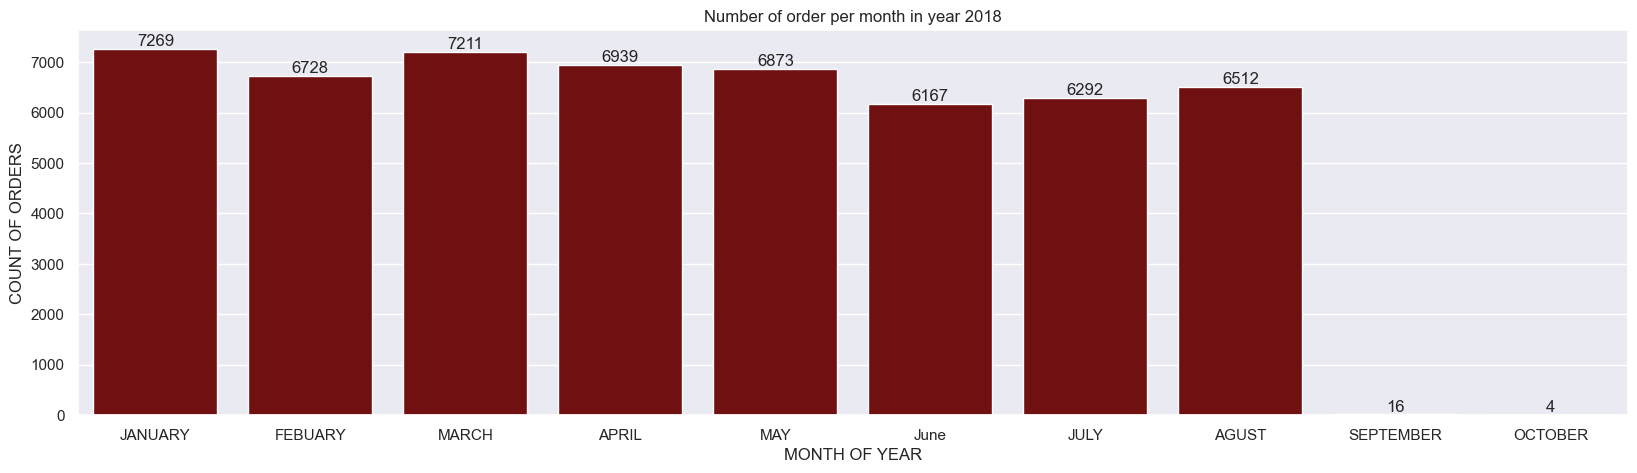

In [23]:
x=list(gb3.index)
arr=('JANUARY','FEBUARY','MARCH','APRIL','MAY','June','JULY','AGUST','SEPTEMBER','OCTOBER')
yl=[7269,6728,7211,6939,6873,6167,6292,6512,16,4]
ax=sns.barplot(x=arr,y=yl,color='maroon')
ax.bar_label(ax.containers[0])
plt.title("Number of order per month in year 2018")
plt.xlabel("MONTH OF YEAR")
plt.ylabel("COUNT OF ORDERS")

plt.show()

Conclusion :-From this chart we can see that highest orders has come in january month.

3. Calculate the percentage of total revenue contributed by each product category.
   -

In [27]:
total_of_sales=join_prop['payment_value'].sum()
total_of_sales

np.float64(20308134.709999997)

In [28]:
each_category=join_prop.groupby(join_prop['product_category'])['payment_value'].sum()/(total_of_sales)*100
df=each_category.reset_index()
df

,product_category,payment_value
0,Agro Industria e Comercio,0.584646
1,Art,0.152613
2,Arts and Crafts,0.011454
3,Bags Accessories,0.921558
4,Blu Ray DVDs,0.039074
...,...,...
68,sport leisure,6.855024
69,stationary store,1.563118
70,technical books,0.122687
71,telephony,2.397473


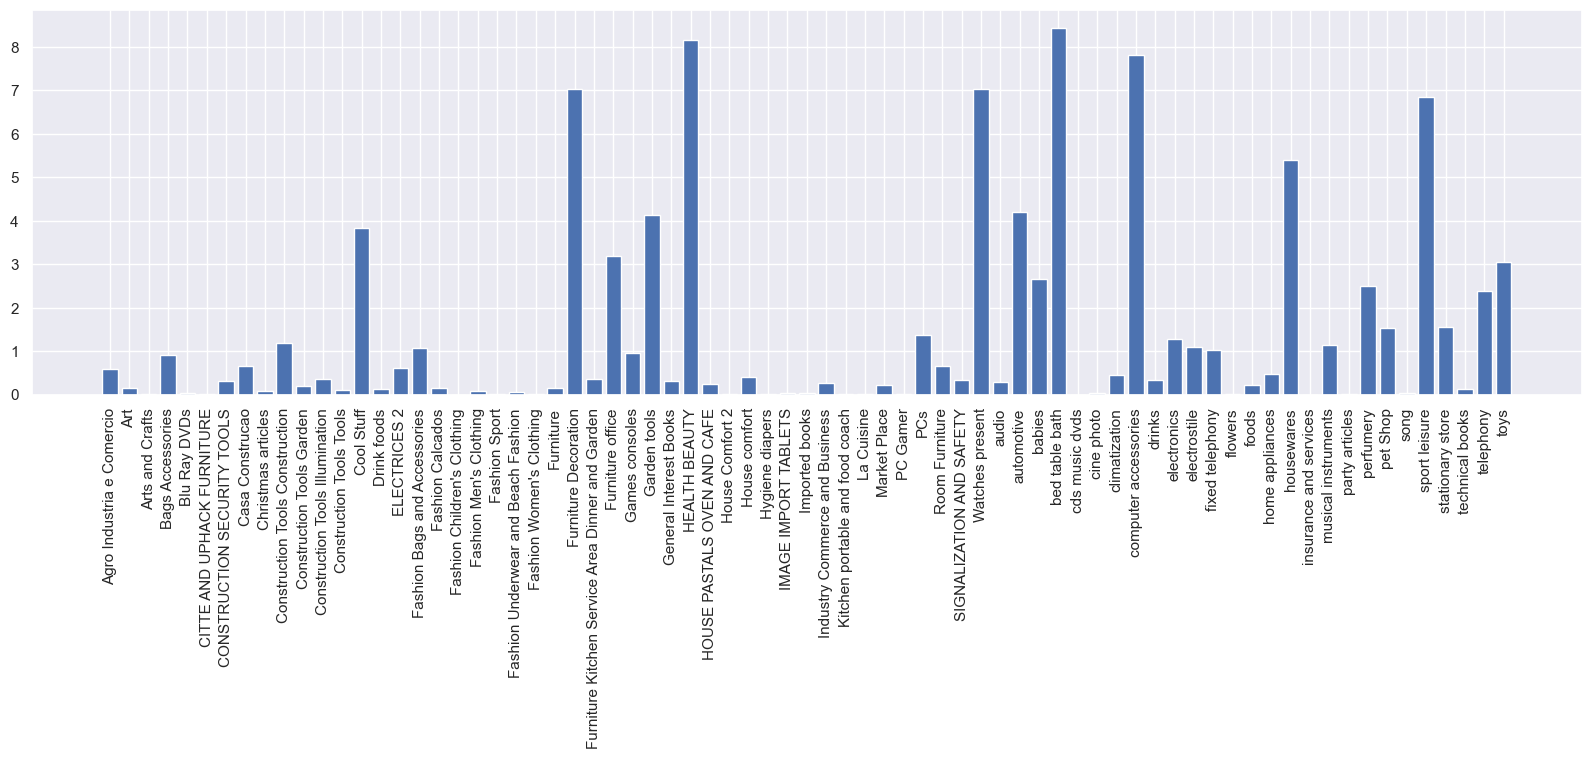

In [29]:
plt.bar(each_category.index,each_category.values)
plt.xticks(rotation = 90)
plt.show()

From this chart we can see the most of the revenue is genrated from 'bed table bath' category
highest percentage reveue is genrated by the 'bed table bath ' producgt category

4. Identify the correlation between product price and the number of times a product has been purchased.
   -

In [30]:
query="""select products.product_category ,count(products.product_id) as count_id,avg(order_items.price)as average_price from ecomerce.products
join ecomerce.order_items on products.product_id=order_items.product_id
group by products.product_category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city" ,"tatal_order","average products/order"])
df.head(10)


,customer city,tatal_order,average products/order
0,Cool Stuff,7622,167.467402
1,electronics,5548,57.911727
2,sport leisure,17332,114.547786
3,computer accessories,15718,116.441561
4,HEALTH BEAUTY,19398,130.281425
5,toys,8270,117.468682
6,Watches present,12024,200.777505
7,Furniture Decoration,16748,87.494378
8,Garden tools,8722,111.542055
9,Fashion Underwear and Beach Fashion,266,72.566541


In [31]:
a=np.corrcoef(	df['tatal_order'],df['average products/order'])
a
print("correlation is :",a[0][1])

correlation is : -0.10689847098448196


5. Calculate the total revenue generated by each seller, and rank them by revenue.
   -
   

In [32]:
query="""select *,dense_rank() over(order by Total_revenue desc) from (select sellers.seller_id,sum(payments.payment_value) as Total_revenue from ecomerce.sellers
join ecomerce.order_items
on sellers.seller_id=order_items.order_id
join ecomerce.payments
on order_items.order_id=payments.order_id
group by sellers.seller_id) as t"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=['seller_id','Total_revenue','rank'])
df=df.head(20)
df


,seller_id,Total_revenue,rank
0,e11fec6c25945565c1ef4f14fc3c03b7,1995.69,1
1,91f377dafe157043ee827b080a27e3f5,743.88,2
2,65bbd0719855fe808bb19f62dfa9f42c,709.28,3
3,f30607daae66843552e00843c6de88ef,695.99,4
4,c75886866a89a0c9a04fbcd4699f3772,667.99,5
5,ede510a059fd07ccec20bff19a227fa3,609.48,6
6,b4d7995506859f96187970c8275ee66c,540.02,7
7,dcb4a1d21593a108db61f12a4b3d61db,449.68,8
8,1cb6cfd9e6306cfe607017391834999a,417.40,9
9,83c55d64c56ad16ba3c0f7858cd709d0,408.66,10


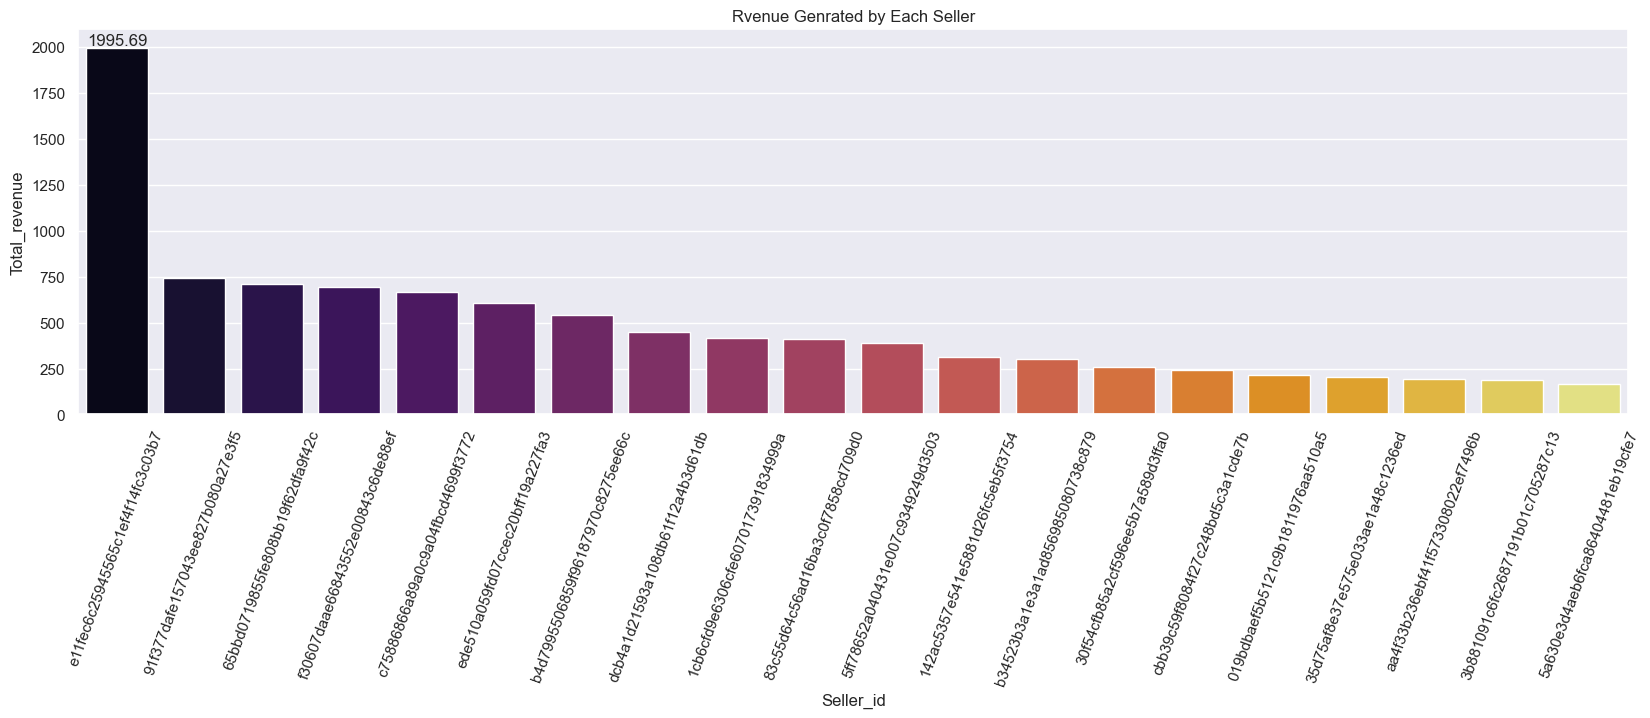

In [33]:
ax=sns.barplot(data=df,x='seller_id',y='Total_revenue',palette='inferno',hue='seller_id')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=70)
plt.xlabel('Seller_id')
plt.title('Rvenue Genrated by Each Seller')
plt.show()

In [34]:
new=pd.merge(join_prop,orders,on='order_id')
new

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category,product_name_length,product_description_length,...,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Cool Stuff,58.0,598.0,...,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet Shop,56.0,239.0,...,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Furniture Decoration,59.0,695.0,...,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,...,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Garden tools,59.0,409.0,...,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,...,UPI,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computer accessories,31.0,232.0,...,UPI,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sport leisure,43.0,869.0,...,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computer accessories,56.0,1306.0,...,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [70]:
query="""select *,((sales-previous_sales)/previous_sales)*100 as growth from (
with a as  (
select year(orders.order_purchase_timestamp)as years,
 round(sum(payments.payment_value),2) as sales
from ecomerce.orders join ecomerce.payments on orders.order_id=payments.order_id
group by years order by years desc)

select years,sales,lag(sales,1) over(order by years) as previous_sales from a) as t"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Year','Sales','Previous Sales','Growth'])
df.replace(np.nan,0)
df

,Year,Sales,Previous Sales,Growth
0,2016,475080.56,NaN,NaN
1,2017,58063676.14,475080.56,12121.858992
2,2018,69682400.82,58063676.14,20.010315


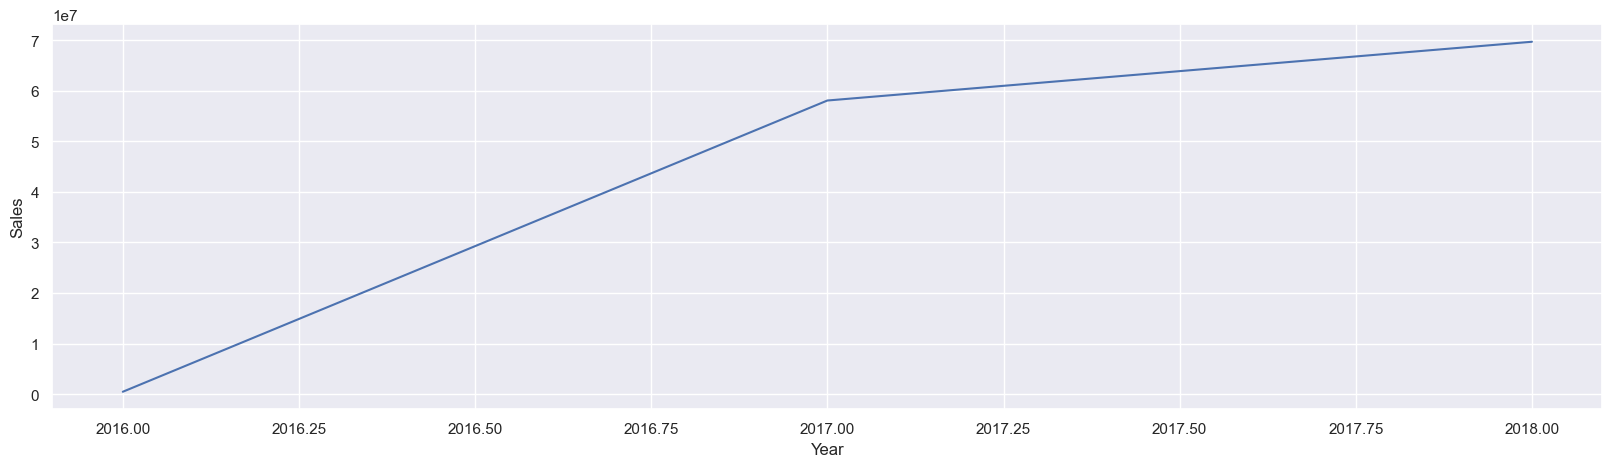

In [72]:
sns.lineplot(data=df,x='Year',y='Sales')
plt.show()

conclusion :- Sales increment based on year.

Title :-EDA
-

Conclusion :-Doing EDA on sales data and make some analysis making conclusion.


Author :-Rihan Ali